In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Data Visualization

In [3]:
dt=pd.read_csv('heart.csv')
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dt[['sex']].head()

,sex
0,1
1,1
2,0
3,1
4,0


In [5]:
dt.isnull().values.any()

False

In [6]:
data=dt
young_ages=data[(data.age>=29)&(data.age<40)]
middle_ages=data[(data.age>=40)&(data.age<55)]
elderly_ages=data[(data.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


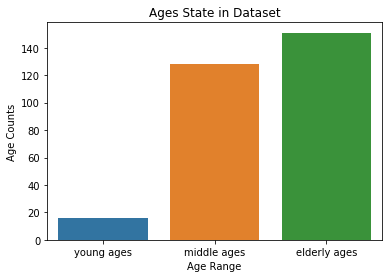

In [7]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

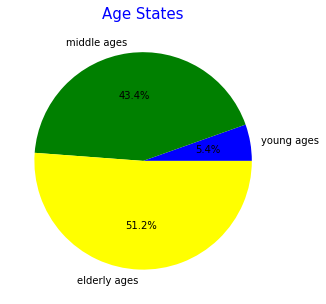

In [8]:
colors = ['blue','green','yellow']
plt.figure(figsize = (5,5))
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'],colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

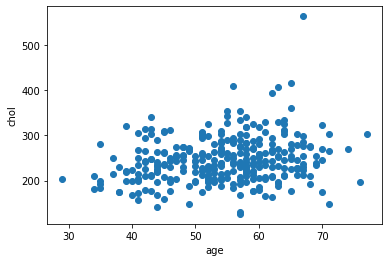

In [9]:
dt=dt
plt.scatter(dt['age'],dt['chol'])
plt.xlabel("age")
plt.ylabel("chol")
plt.show()

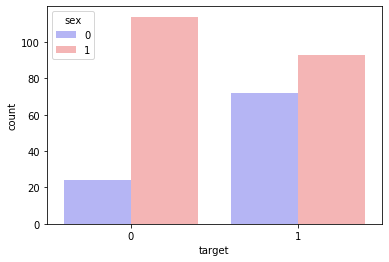

In [10]:
    sns.countplot(data=dt, x="target", hue="sex", palette="bwr")

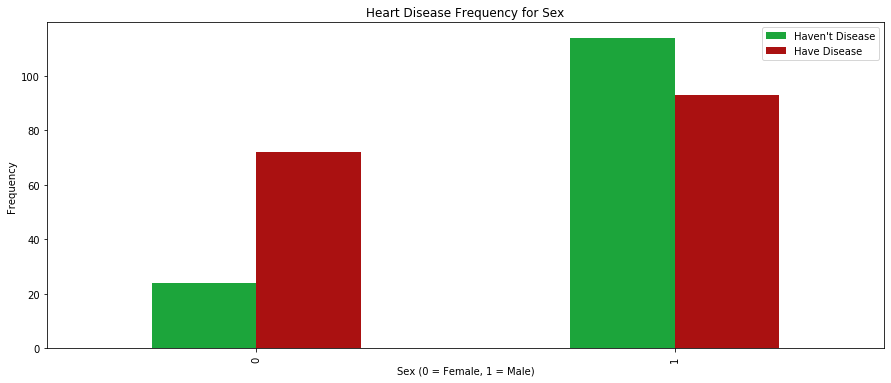

In [11]:
pd.crosstab(dt.sex,dt.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [12]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


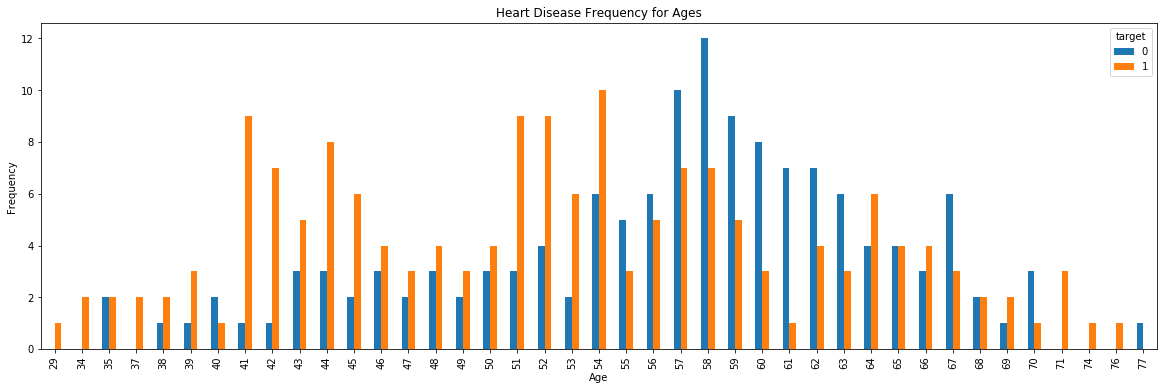

In [13]:
pd.crosstab(dt.age,dt.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()


In [14]:
dt['sex'][dt['sex'] == 0] = 'female'
dt['sex'][dt['sex'] == 1] = 'male'
dt['chest_pain_type'][dt['chest_pain_type'] == 0] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'asymptomatic'

dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'no'
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'yes'

dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

C:\Users\hai\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hai\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hai\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hai\Anaconda\lib\si

In [15]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


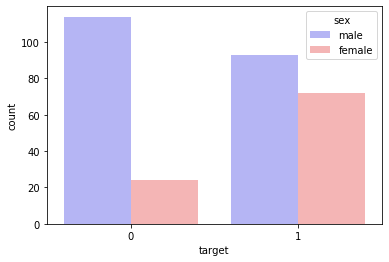

In [16]:
sns.countplot(data=dt, x="target", hue="sex", palette="bwr")

In [17]:
d1=pd.get_dummies(dt.sex)
d2=pd.get_dummies(dt.chest_pain_type)
d3=pd.get_dummies(dt.fasting_blood_sugar)
d4=pd.get_dummies(dt.rest_ecg)
d5=pd.get_dummies(dt.exercise_induced_angina)
d6=pd.get_dummies(dt.st_slope)
d7=pd.get_dummies(dt.thalassemia)


In [18]:

dt.drop(['sex','chest_pain_type','fasting_blood_sugar', 'rest_ecg','exercise_induced_angina','st_slope','thalassemia'],axis=1,inplace=True )
dt= pd.concat([dt,d1,d2,d3,d4,d5,d6,d7],axis=1)

In [19]:
dt.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,female,male,asymptomatic,...,normal,no,yes,0,flat,upsloping,0,fixed defect,normal,reversable defect
0,63,145,233,150,2.3,0,1,0,1,1,...,1,1,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,1,0,0,...,1,1,0,0,1,0,0,1,0,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,57,120,354,163,0.6,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [20]:
dt[['male','female']].head()

,male,female
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1


In [21]:
dt.shape

(303, 27)

In [22]:
dt.columns

Index([                         'age',       'resting_blood_pressure',
                        'cholesterol',      'max_heart_rate_achieved',
                      'st_depression',            'num_major_vessels',
                             'target',                       'female',
                               'male',                 'asymptomatic',
                    'atypical angina',             'non-anginal pain',
                     'typical angina',        'greater than 120mg/ml',
                'lower than 120mg/ml',        'ST-T wave abnormality',
       'left ventricular hypertrophy',                       'normal',
                                 'no',                          'yes',
                                    0,                         'flat',
                          'upsloping',                              0,
                       'fixed defect',                       'normal',
                  'reversable defect'],
      dtype='object')

# Applying Logistic Regression

In [23]:
X=dt.drop(["target"],axis=1)
y=dt.target

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
predictions=model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
classification_report(y_test,predictions)

'             precision    recall  f1-score   support\n\n          0       0.85      0.92      0.88        25\n          1       0.94      0.89      0.91        36\n\navg / total       0.90      0.90      0.90        61\n'

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[23,  2],
       [ 4, 32]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,predictions)

0.9016393442622951

# Applying Decission Tree

In [33]:
X=dt.drop(["target"],axis=1)
y=dt.target

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
from sklearn import tree

In [36]:
md=tree.DecisionTreeClassifier()

In [37]:
md.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
md.score(X_test,y_test)

0.8360655737704918

# Applying Random Forest

In [40]:
X=dt.drop(["target"],axis=1)
y=dt.target

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\hai\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [43]:
rf = RandomForestClassifier (n_estimators=100)

In [44]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
accuracy = rf.score(X_test, y_test)
print("Accuracy = {}%".format(accuracy * 100))
 

Accuracy = 86.88524590163934%


In [46]:
predictions=rf.predict(X_test)

In [47]:
from sklearn.metrics import classification_report

# CLASSIFICATION REPORT

In [48]:
classification_report(y_test,predictions)

'             precision    recall  f1-score   support\n\n          0       0.86      0.86      0.86        29\n          1       0.88      0.88      0.88        32\n\navg / total       0.87      0.87      0.87        61\n'

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,predictions)

0.8688524590163934

# Using Support Vector Machine

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import pandas as pd

x=dt.drop(["target"],axis=1)
y=dt.target
print(x.shape,y.shape)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)

(303, 26) (303,)


# for linear kernal


In [57]:
obj=SVC(kernel="linear")
obj.fit(xtrain,ytrain)
predict=obj.predict(xtest)
print("accc score",accuracy_score(predict,ytest))
print("confussion matrix",confusion_matrix(predict,ytest))
print("classification report",classification_report(predict,ytest))

accc score 0.8791208791208791
confussion matrix [[33  6]
 [ 5 47]]
classification report              precision    recall  f1-score   support

          0       0.87      0.85      0.86        39
          1       0.89      0.90      0.90        52

avg / total       0.88      0.88      0.88        91



# for rbf kernal

In [58]:

obj=SVC(kernel="rbf",gamma=0.5)
obj.fit(xtrain,ytrain)
predict=obj.predict(xtest)
print("********for rbf kernal*******")
print("accc score",accuracy_score(predict,ytest))
print("confussion matrix",confusion_matrix(predict,ytest))
print("classification report",classification_report(predict,ytest))


********for rbf kernal*******
accc score 0.5824175824175825
confussion matrix [[ 0  0]
 [38 53]]
classification report              precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.58      0.74        91

avg / total       1.00      0.58      0.74        91



C:\Users\hai\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
